## Advanced Regression Assignment

By: Anurag Upadhyay

### Objective:

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Concepts Used:

- EDA
- Linear Regression
- Regularization

In [1]:
##Importing the relevant libraries for analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Loading the dataset into a dataframe named as "housing".

housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## checking the information available in each column of the dataset.

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- We see the presence of large number of missing values in dataset in many features and hence we need to do the data cleaning before analysis.

## Data Cleaning

In [4]:
## checking out the percentage of null values present in the dataset for each feature.

(housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

In [5]:
## As per the data dictionary, for many features "NA" signifies absence of that feature.
## As that feature majorily not present in the dataset.
## Dropping variables having more than 80% NAN values.

housing.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1,inplace=True)

In [6]:
## Again checking the missing values in the dataset.

(housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False)

FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageType        5.547945
GarageFinish      5.547945
                   ...    
CentralAir        0.000000
HeatingQC         0.000000
SaleCondition     0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 77, dtype: float64

In [7]:
## For some of the categorical variables, NA signifies absence of that particular feature and hence can be replaced with No feature.
housing["FireplaceQu"].fillna("No Fireplace",inplace=True)
housing["GarageType"].fillna("No Garage",inplace=True)
housing["GarageFinish"].fillna("No Garage",inplace=True)

In [8]:
## Checking out for more missing values.
((housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False))


LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
                  ...    
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
Id               0.000000
Length: 77, dtype: float64

In [9]:
housing["GarageCond"].fillna("No Garage",inplace=True)
housing["GarageQual"].fillna("No Garage",inplace=True)

In [10]:
## Checking out for more missing values.
((housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False))

LotFrontage     17.739726
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
                  ...    
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Id               0.000000
Length: 77, dtype: float64

In [11]:
## Repeating the above steps for missing values in the basement related features.
housing["BsmtFinType2"].fillna("No Basement",inplace=True)
housing["BsmtExposure"].fillna("No Basement",inplace=True)
housing["BsmtFinType1"].fillna("No Basement",inplace=True)

In [12]:
## Checking out for more missing values.
((housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False))

LotFrontage     17.739726
GarageYrBlt      5.547945
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
                  ...    
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Id               0.000000
Length: 77, dtype: float64

In [13]:
housing["BsmtCond"].fillna("No Basement",inplace=True)
housing["BsmtQual"].fillna("No Basement",inplace=True)

In [14]:
## Checking out for more missing values.
((housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False))

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
                  ...    
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Id               0.000000
Length: 77, dtype: float64

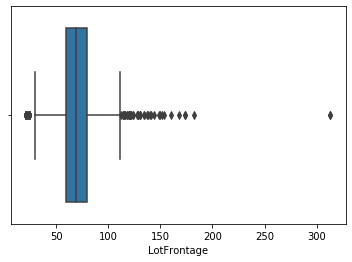

In [15]:
## LotFronatage is quantitative variable and hence trying to replace missing values with either mean or median.
## Plotting a boxplot to understand the spread of values in LotFrontage.

sns.boxplot(housing["LotFrontage"])

In [16]:
housing["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
## Due to the presence of outliers in the data, going for replacement of missing values with the median score of 69.
housing["LotFrontage"].fillna(housing["LotFrontage"].median(),inplace=True)


In [18]:
((housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False))

GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
SalePrice       0.000000
                  ...   
KitchenAbvGr    0.000000
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Functional      0.000000
Id              0.000000
Length: 77, dtype: float64

In [19]:
## GarageYrBlt is a qualitative variable and hence replacing the missing values with the mode value.
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].mode()[0],inplace=True)


In [20]:
## Changing the data type for Garage Yr as it is given as a float while it should be an int.
housing["GarageYrBlt"].astype("int64")

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1460, dtype: int64

In [21]:
## Checking out for more missing values.
((housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False))

MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
SalePrice       0.000000
Foundation      0.000000
                  ...   
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Functional      0.000000
Fireplaces      0.000000
Id              0.000000
Length: 77, dtype: float64

In [22]:
housing["MasVnrType"].mode()[0]

'None'

In [23]:
## Replacing missing values in MasVnrType with the mode value.

housing["MasVnrType"].fillna(housing["MasVnrType"].mode()[0],inplace=True)

In [24]:
housing["MasVnrArea"].mode()[0]

0.0

In [25]:
## Since for MasVnrType=="None", the corresponding MasVnrArea is 0 , hence replacing the missing values in MasVnrArea with 0.

housing["MasVnrArea"].fillna(housing["MasVnrArea"].mode()[0],inplace=True)

In [26]:
## Checking out for more missing values.
((housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False))

Electrical      0.068493
SalePrice       0.000000
Foundation      0.000000
RoofMatl        0.000000
Exterior1st     0.000000
                  ...   
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Functional      0.000000
Fireplaces      0.000000
Id              0.000000
Length: 77, dtype: float64

In [27]:
## replacing missing value in electrical with the mode value.

housing["Electrical"].fillna(housing["Electrical"].mode()[0],inplace=True)

In [28]:
## Checking out for more missing values.
((housing.isnull().sum()/len(housing.index)*100).sort_values(ascending= False))

SalePrice       0.0
ExterCond       0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Id              0.0
Length: 77, dtype: float64

In [29]:
## Removing the id column from the dataset as it adds no informatin value.

housing.drop(["Id"],axis=1,inplace=True)

In [30]:
## Checking out the cleaned dataset.

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


- Now we have a clean dataset with no missing values.
- Proceeding with the Exploratory Data Analysis now.

## Exploratory Data Analysis.

In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [32]:
housing.dtypes.value_counts()

object     39
int64      34
float64     3
dtype: int64

In [33]:
## Since we have 76 features in our dataset, so manually searching for numerical and catgeorical variables is not feasible.
## Hence creating two seperate dataframes for the purpose of carrying out EDA, one for the numerical variables and other for categorical.

In [34]:
## creating a dataframe with only categorical variables.
categorical = housing.loc[:,housing.dtypes==np.object]

In [35]:
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [36]:
## Creating a numerical dataframe for all the numerical columns.

numerical = housing.loc[:,housing.columns.difference(categorical.columns)]

In [37]:
numerical.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706,0,1,0,150,0,...,7,0,208500,0,8,856,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,...,6,0,181500,0,6,1262,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,...,7,0,223500,0,6,920,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,272,...,7,0,140000,0,7,756,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,...,8,0,250000,0,9,1145,192,2000,2000,2008


- Now we proceed with the EDA on numerical features.

### EDA on numerical variables.

<Figure size 1440x864 with 0 Axes>

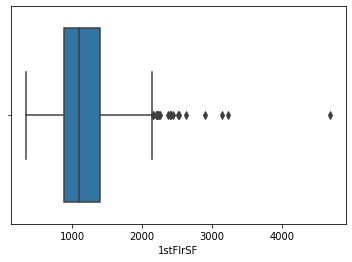

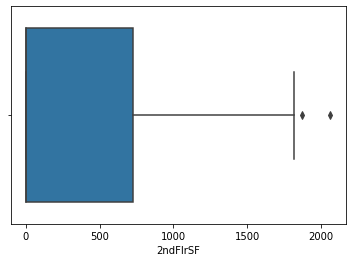

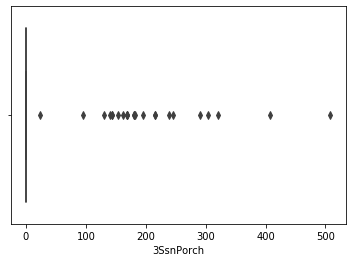

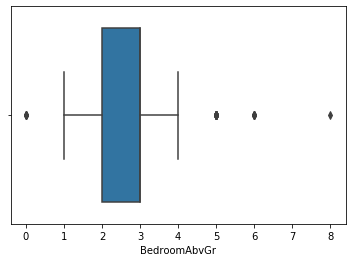

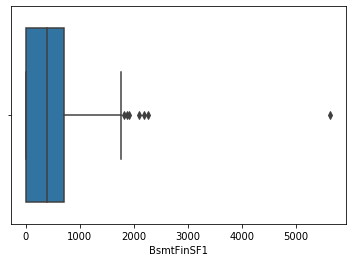

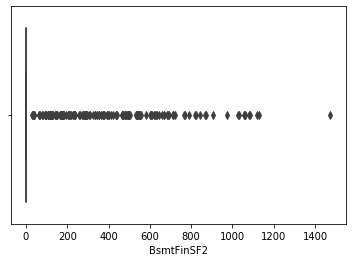

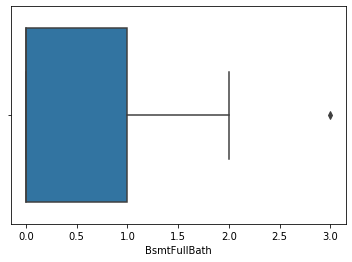

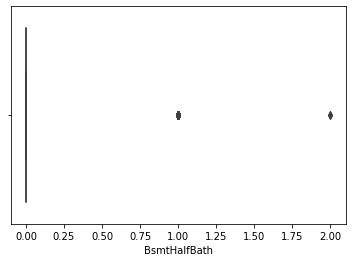

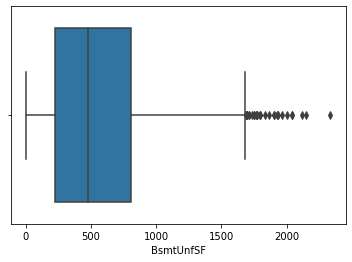

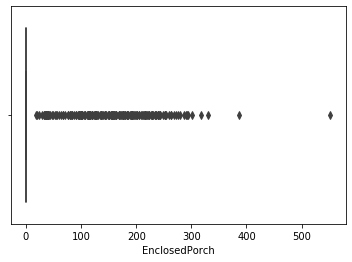

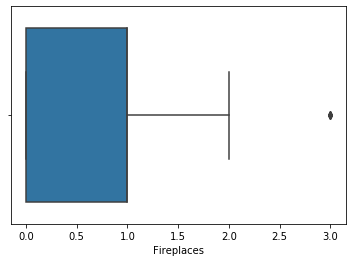

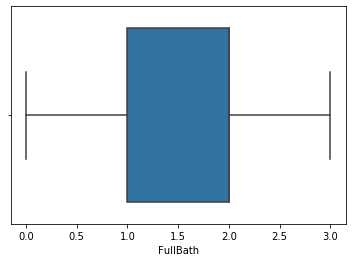

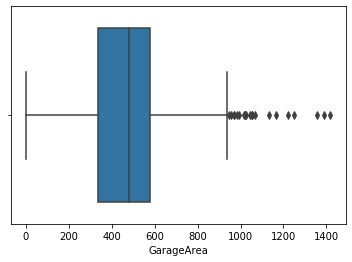

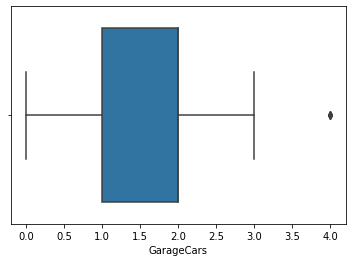

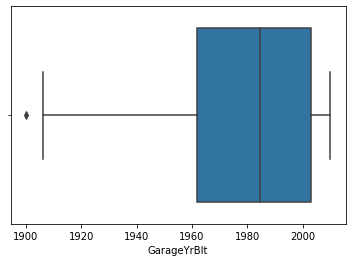

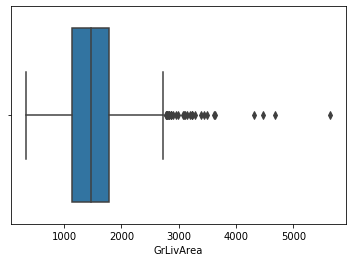

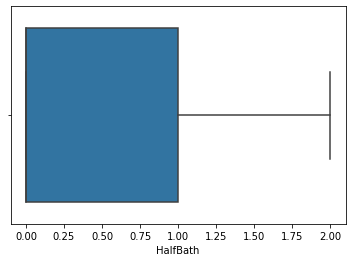

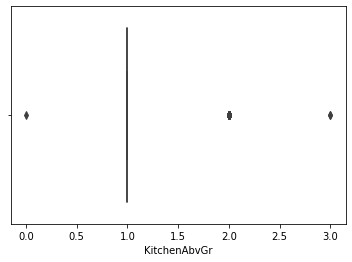

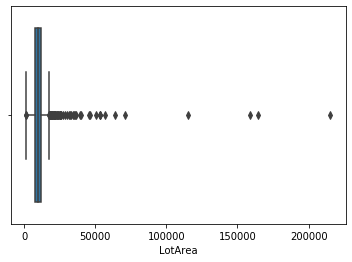

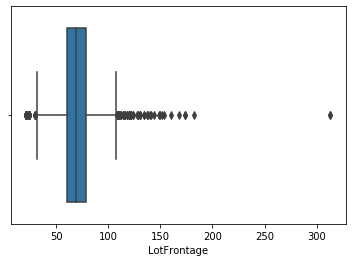

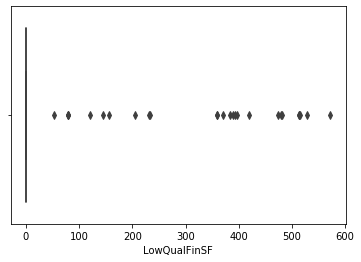

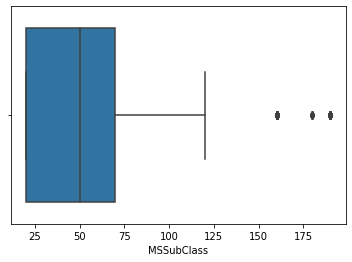

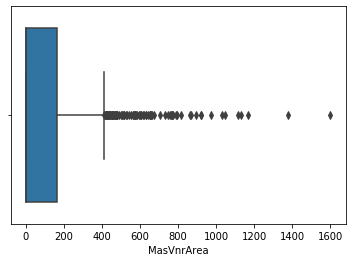

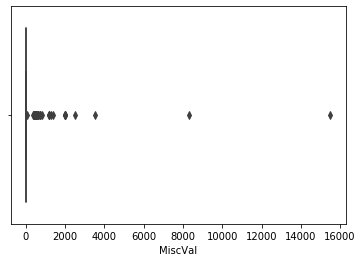

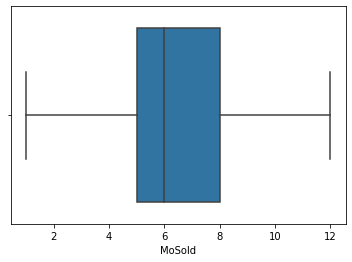

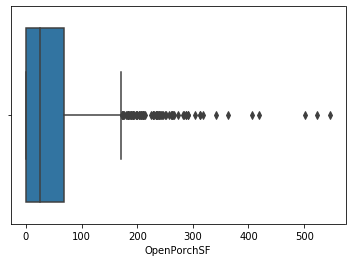

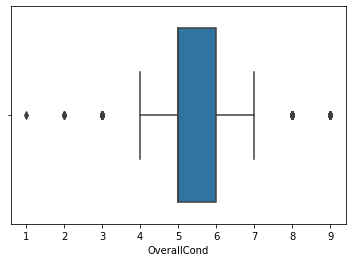

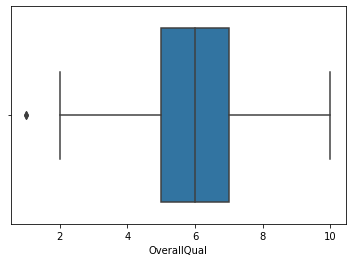

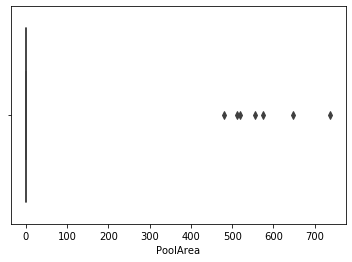

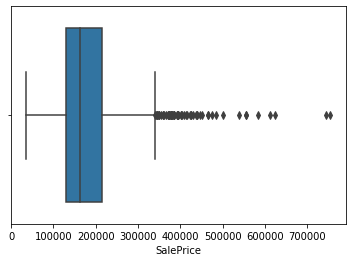

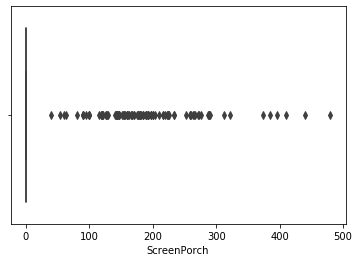

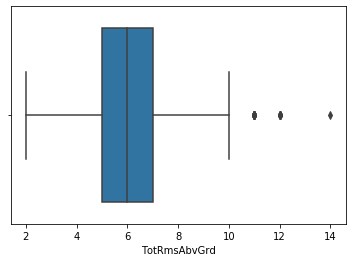

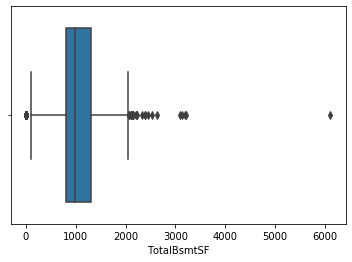

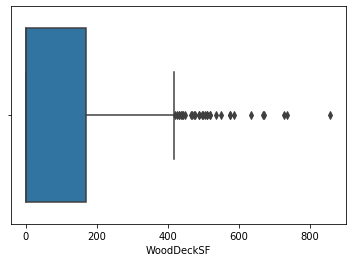

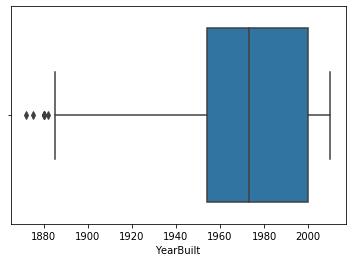

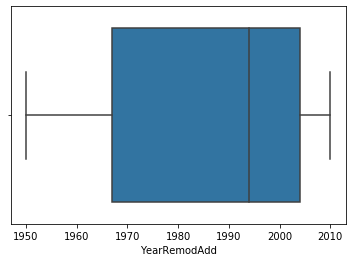

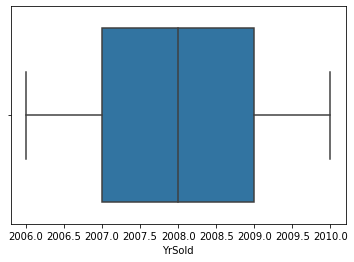

In [38]:
## We will start off with understanding the distribution and checking presence of outliers of each of the numerical feature.
plt.figure(figsize=[20,12])
for item in numerical.columns:
    plt.subplots(1,1)
    sns.boxplot(numerical[item])


- Boxplot for the numeric features indicates presence of outliers.
- Many of the features have most of their values as zero, indicating absence of that particular feature in the dataset.

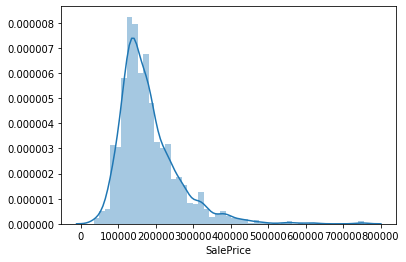

In [39]:
## Looking at the distribution of our target variables i.e.  Sales price

sns.distplot(numerical["SalePrice"])

- Target variable has a skewed distribution.
- We need to transform the target variable to have a normal distribution for better prediction using a linear model.

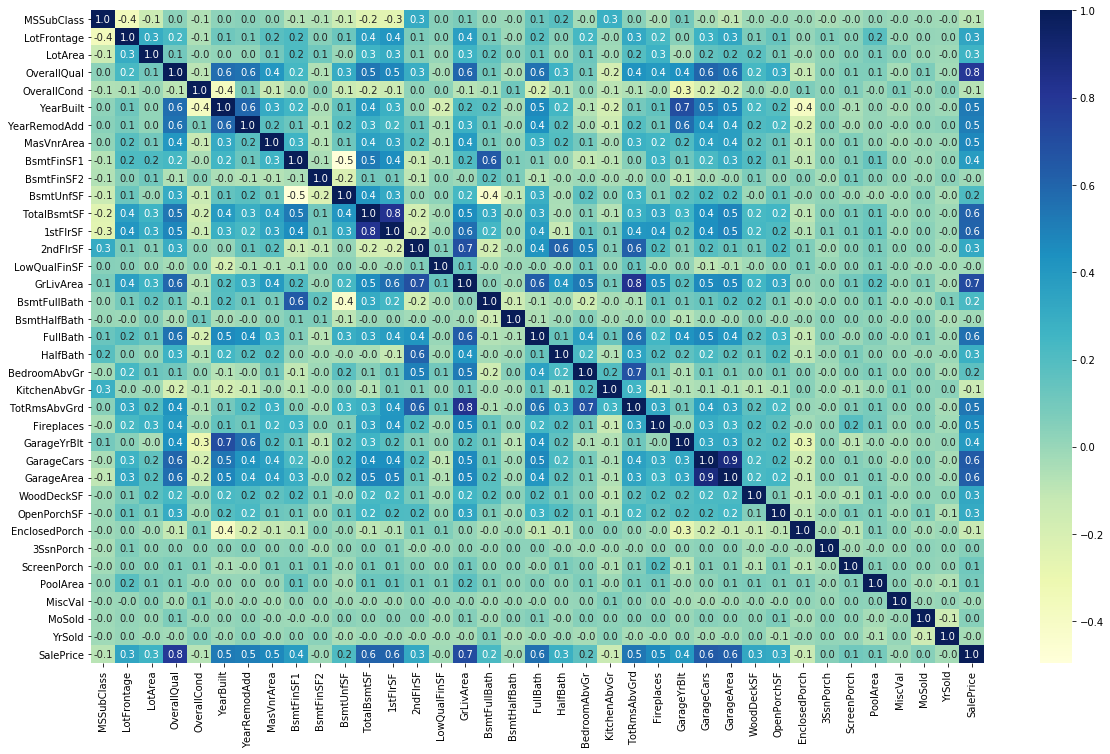

In [40]:
##Creating a heatmap for the numerical features.
plt.figure(figsize=[20,12])
sns.heatmap(housing.corr(),annot=True,cmap="YlGnBu",fmt="0.1f")

## Inferences for numeric features:

- We observe the presence of outliers in the dataset.
- Target variable has a skewed distribution.
- Features like Total Basement Square feet area, Garage Area, Above ground living area exhibit good correlation with price.
- We also detect the presence of multicollinearity as some variables are highly correlated like GarageCars and GarageArea.
- Some of the features including some categorical features of numeric data type have most of their values as "0" indicating absence of that feature in the dataset.

### EDA on Categorical Variables

In [41]:
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [42]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

<Figure size 1440x864 with 0 Axes>

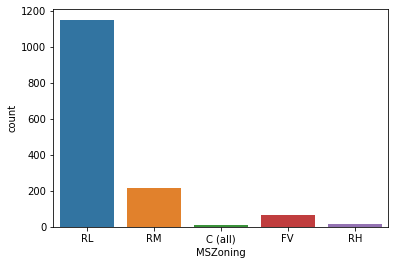

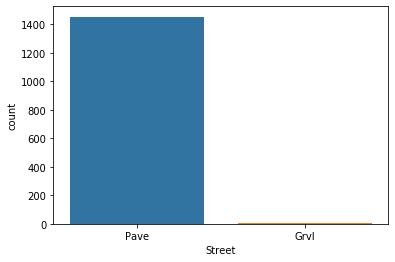

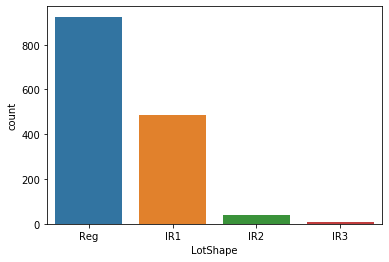

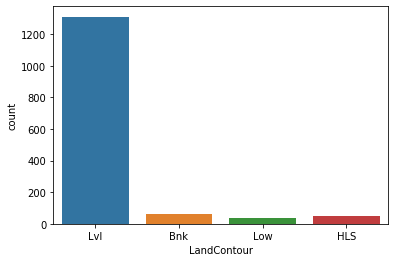

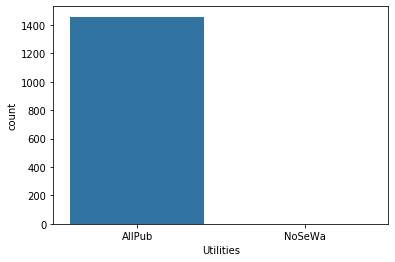

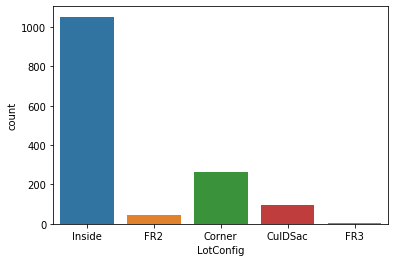

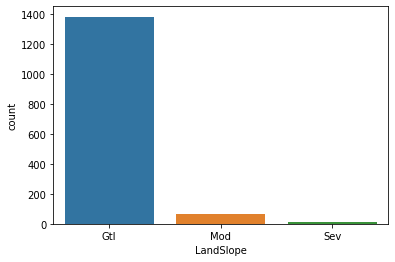

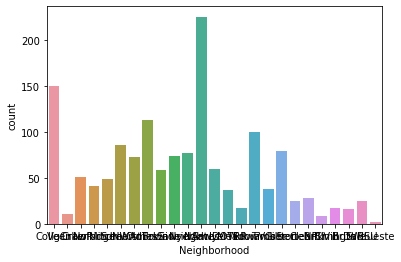

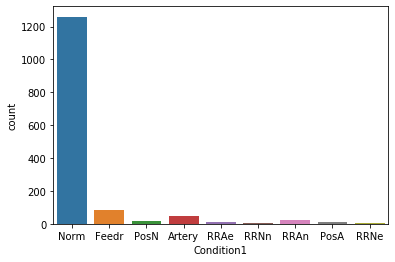

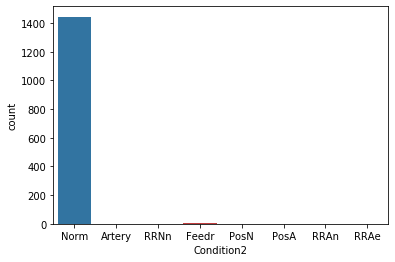

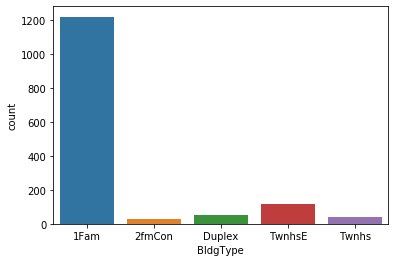

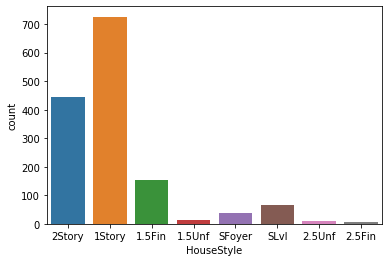

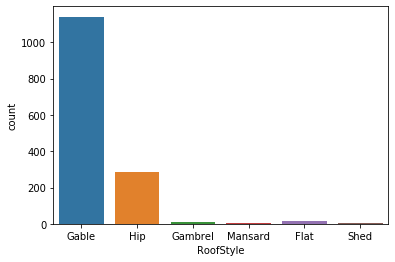

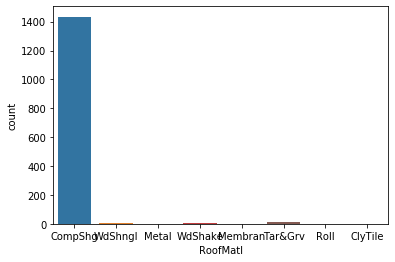

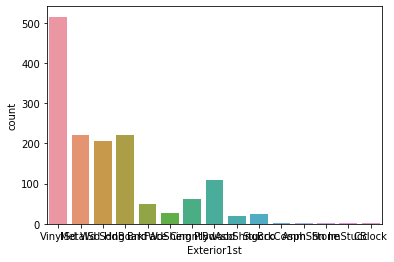

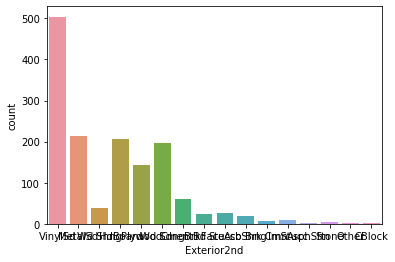

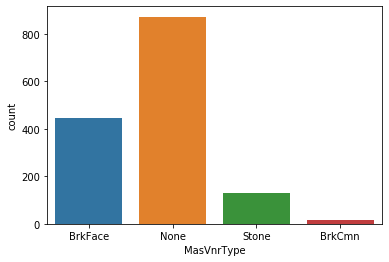

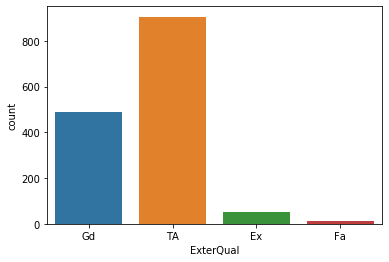

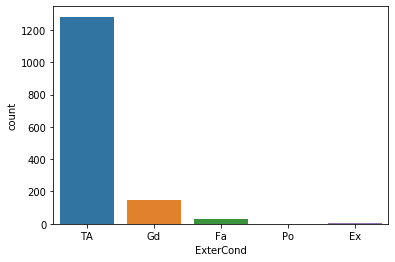

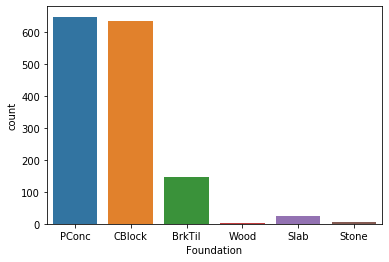

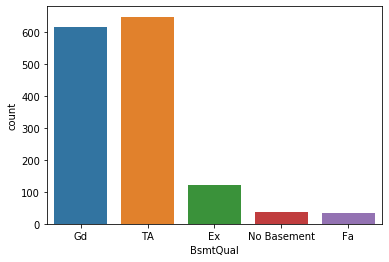

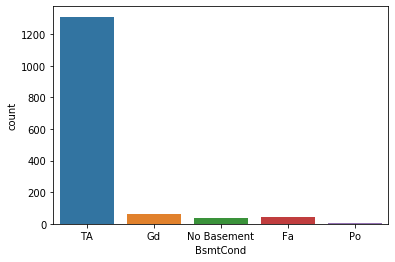

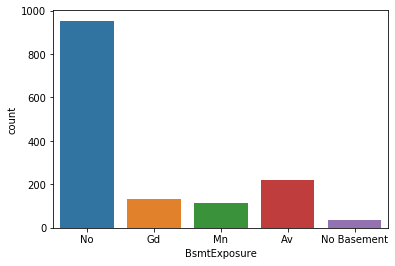

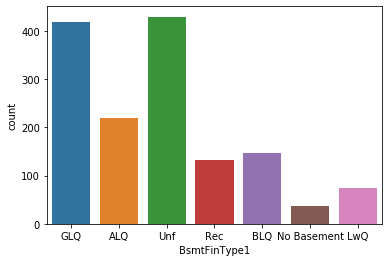

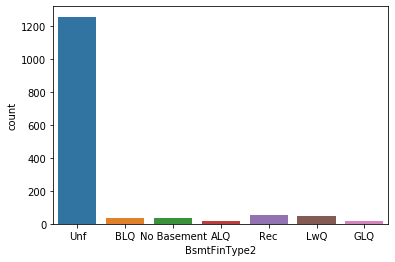

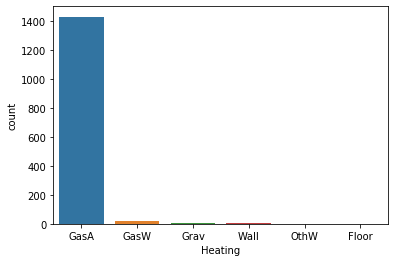

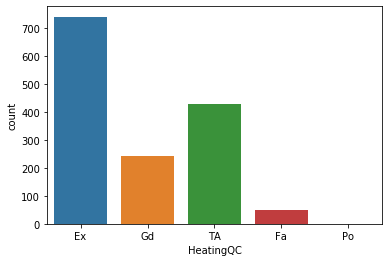

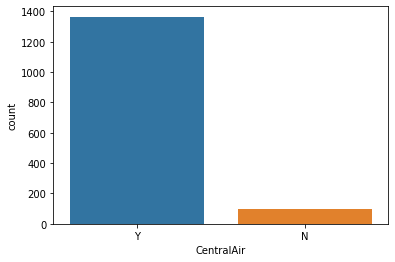

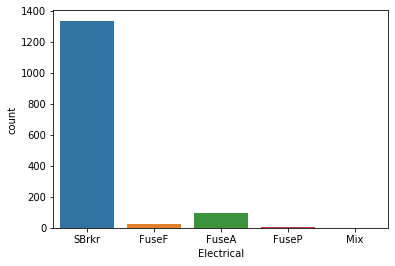

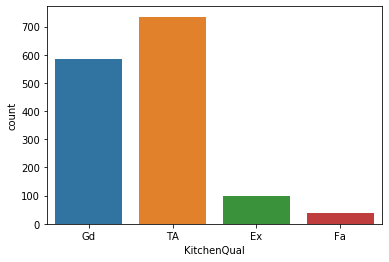

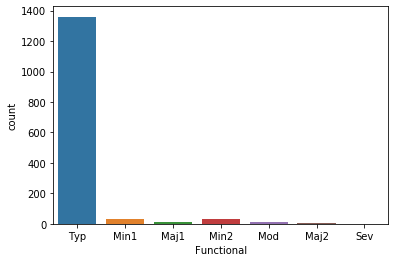

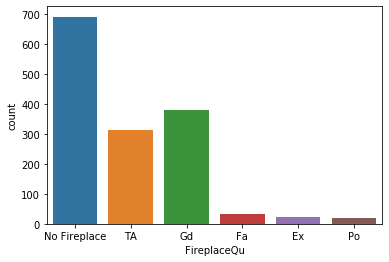

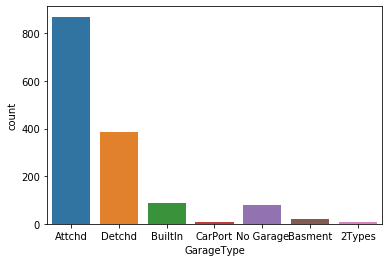

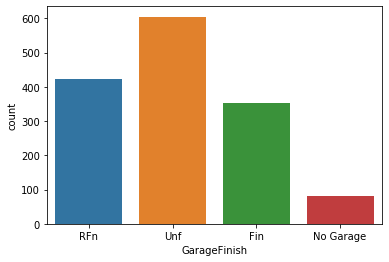

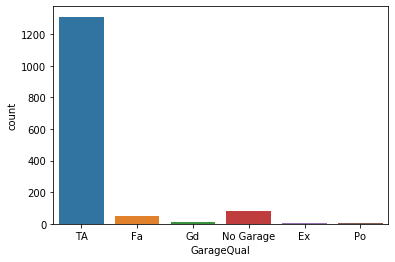

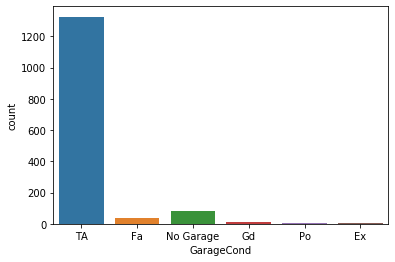

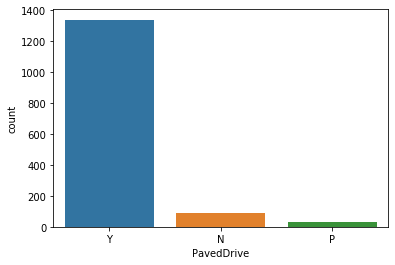

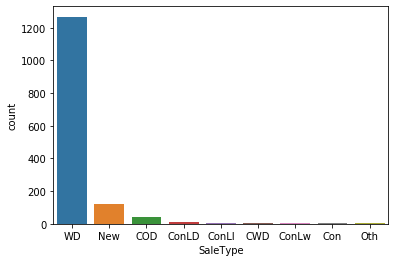

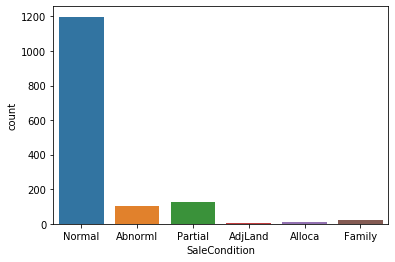

In [43]:
## First we analyse the countplot for each of the categorical variables.
plt.figure(figsize=[20,12])
for item in categorical.columns:
    plt.subplots(1,1)
    sns.countplot(housing[item])
    plt.show()

- From the above plot we see presence of a highly unbalanced class in some of the categorical variables.
- Highly unbalanced class can be indication that the feature is common for entries and may not a good indicator for target variable.

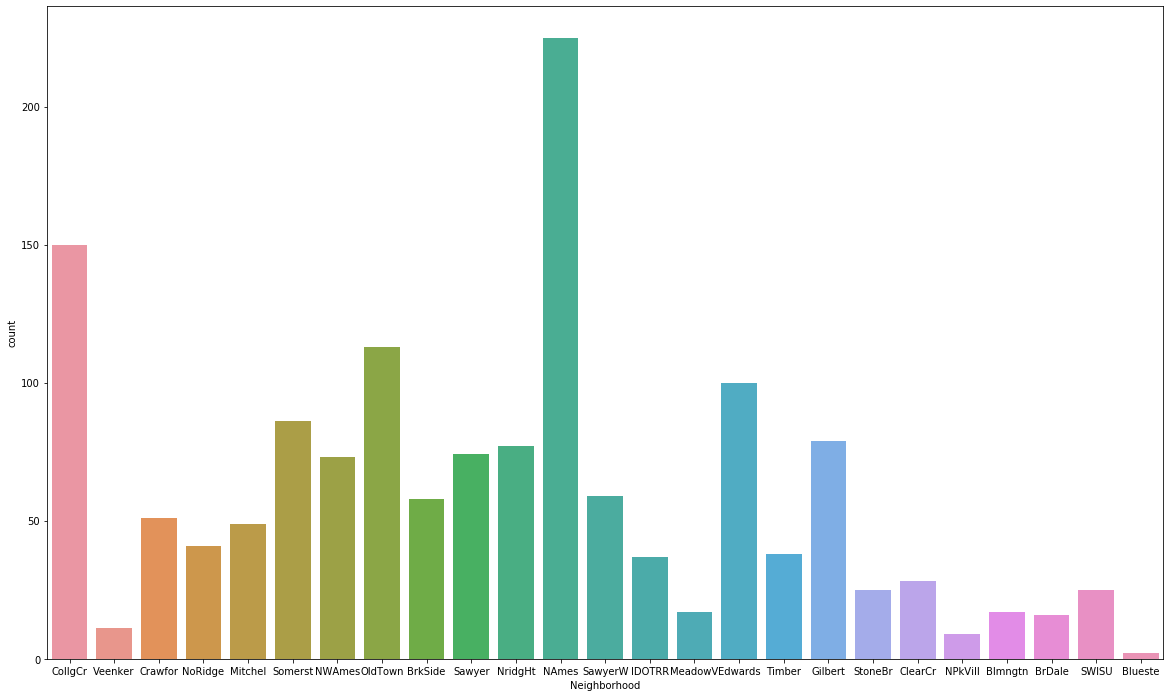

In [44]:
## Checking out the distribution among different neighborhoods.
plt.figure(figsize=[20,12])
sns.countplot(housing["Neighborhood"])

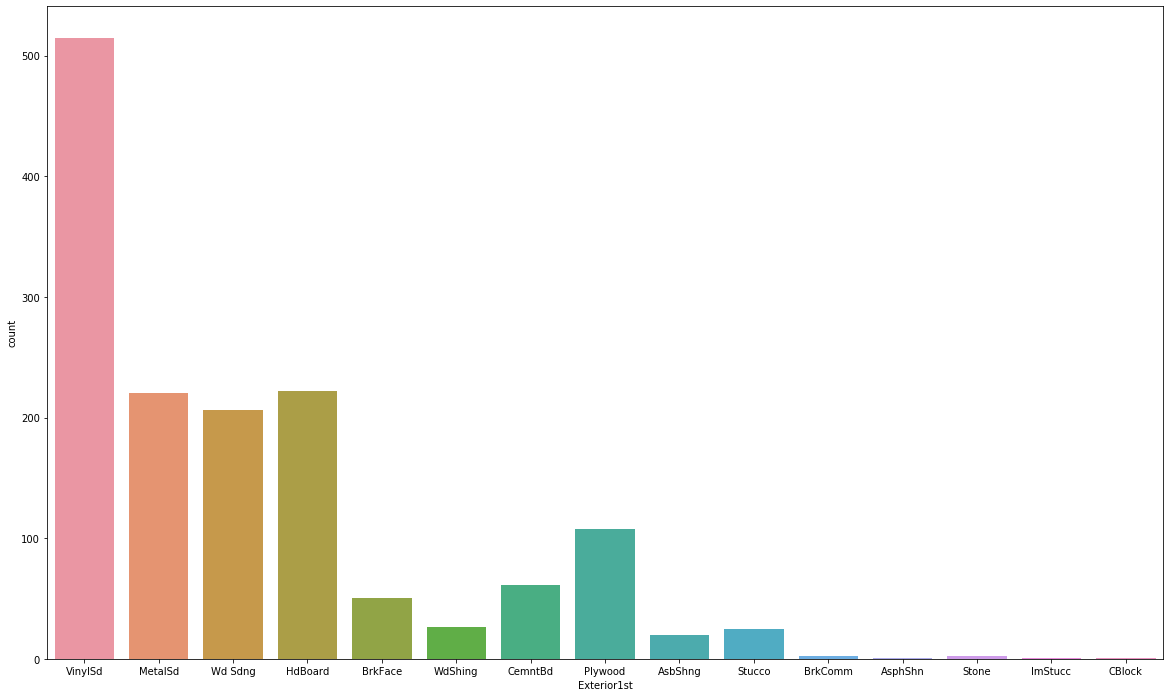

In [45]:
plt.figure(figsize=[20,12])
sns.countplot(housing["Exterior1st"])

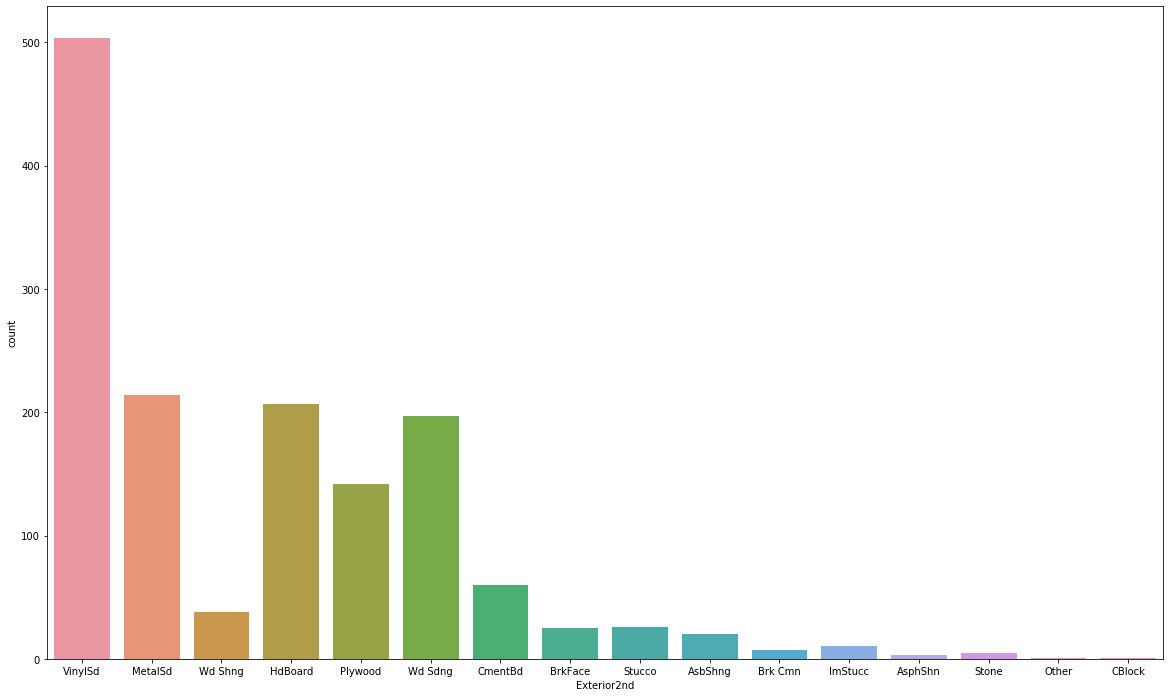

In [46]:
plt.figure(figsize=[20,12])
sns.countplot(housing["Exterior2nd"])

- Most of the houses are in the "NAmes" neighborhood followedd by "CollegeCr".
- People mostly prefer Vinyl Siding for exterior covering of the house.

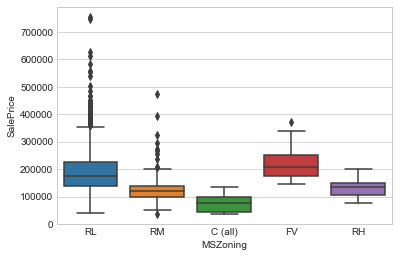

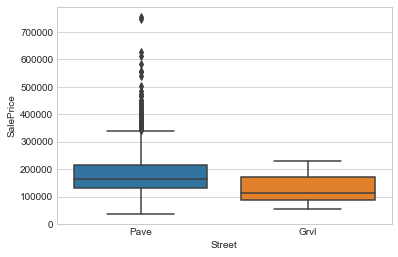

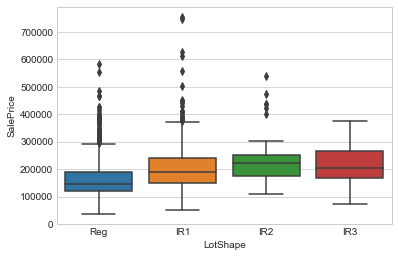

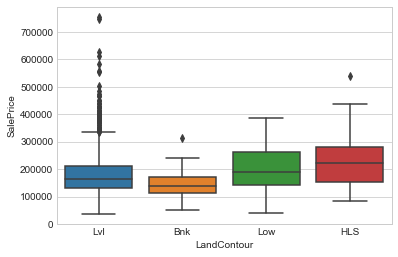

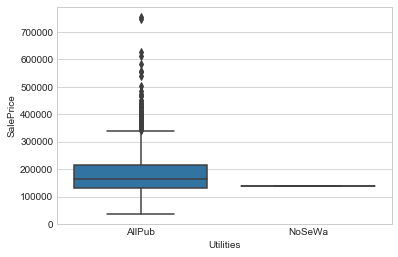

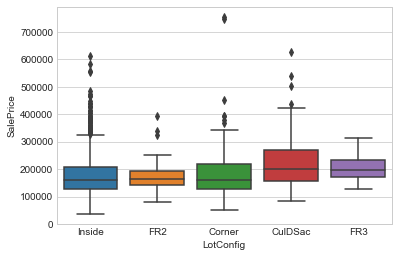

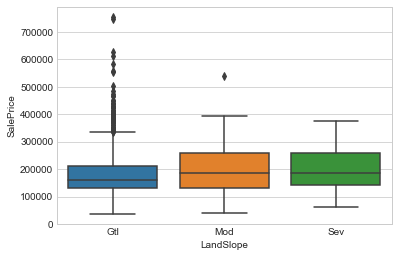

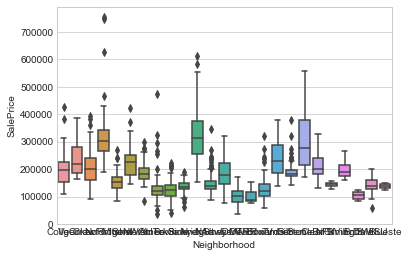

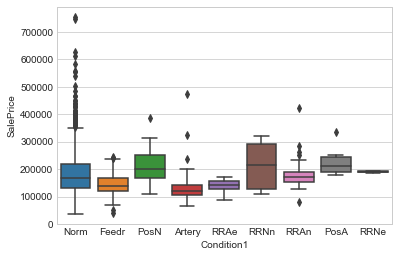

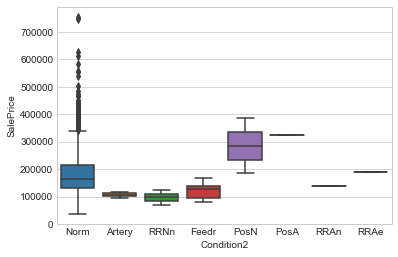

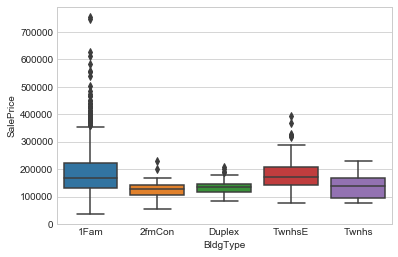

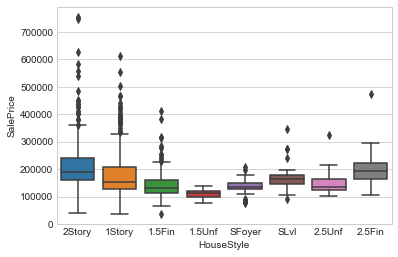

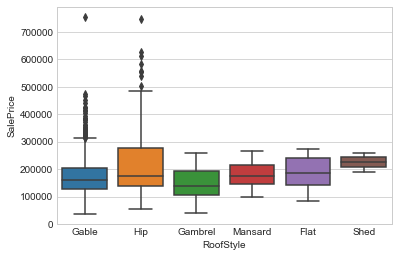

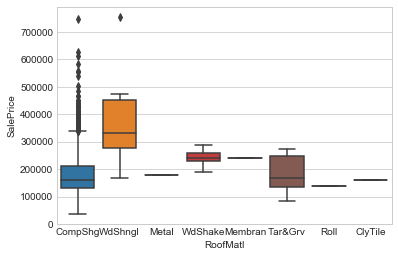

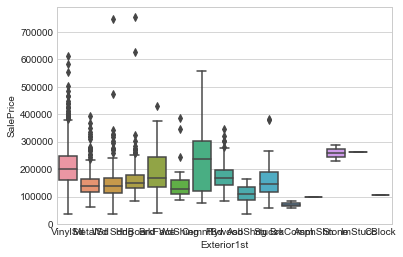

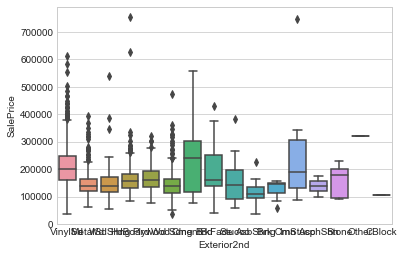

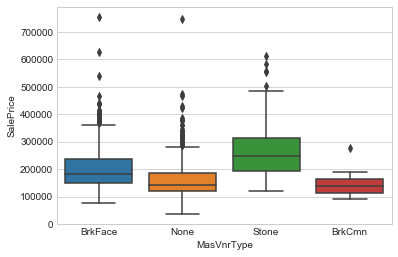

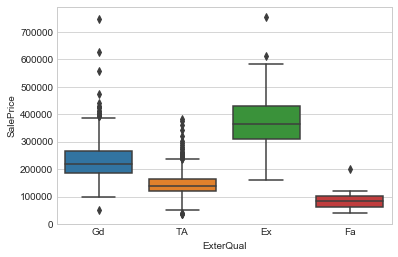

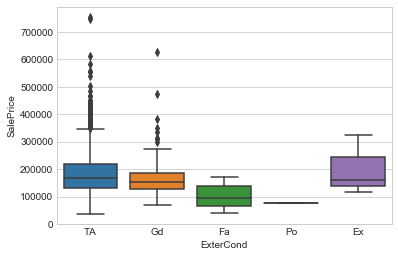

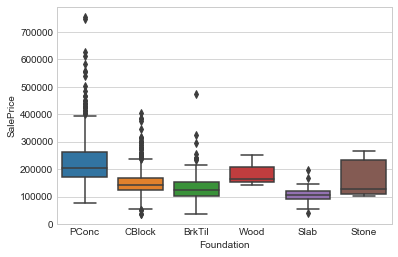

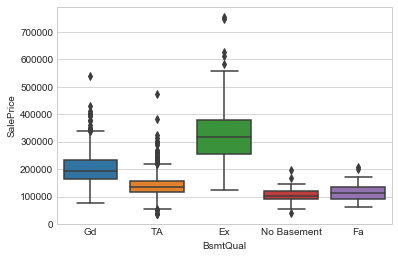

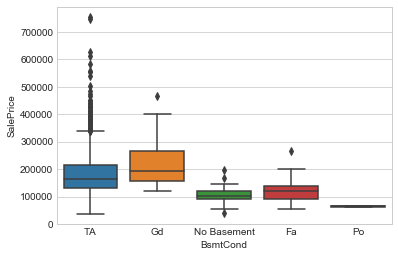

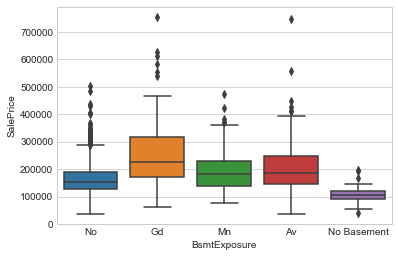

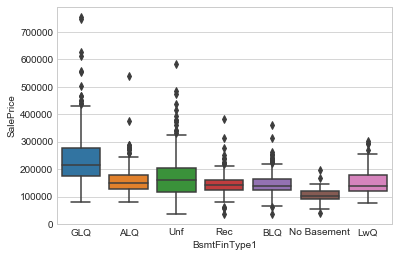

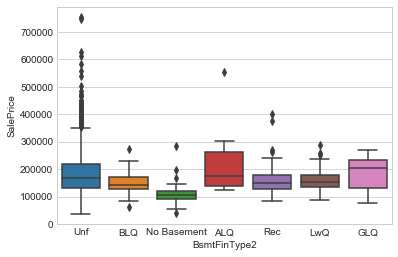

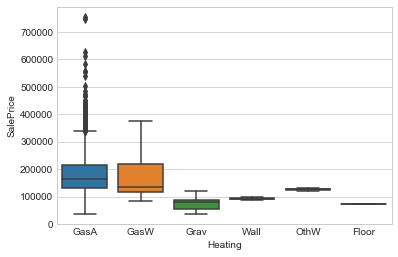

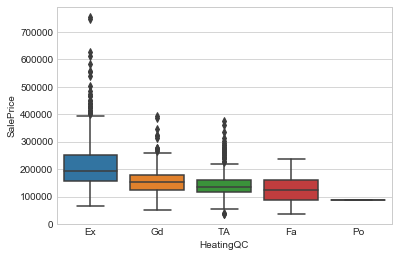

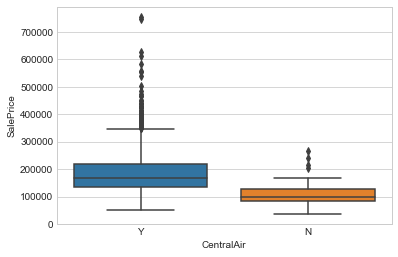

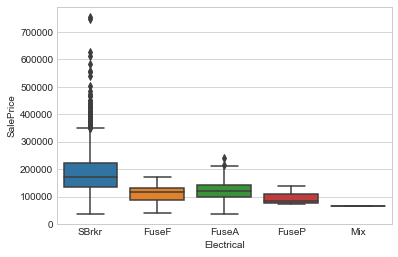

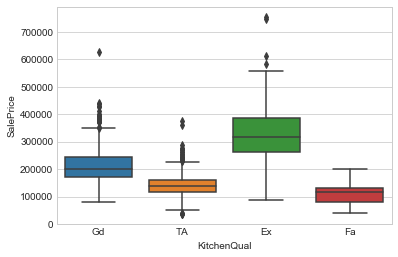

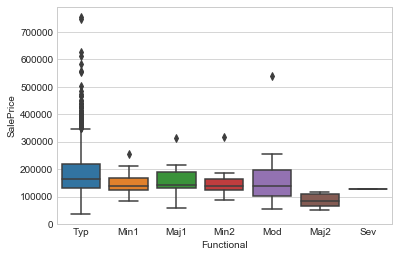

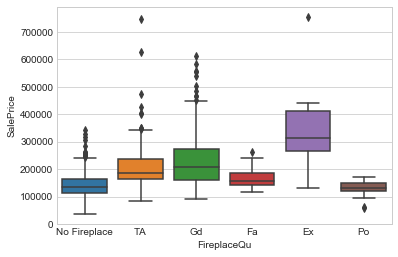

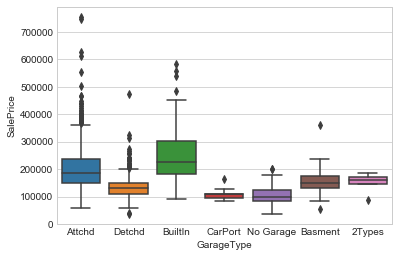

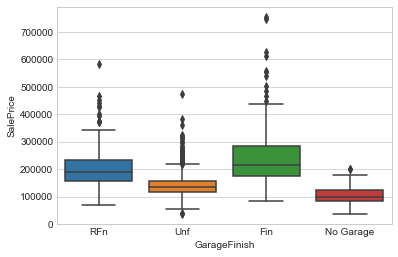

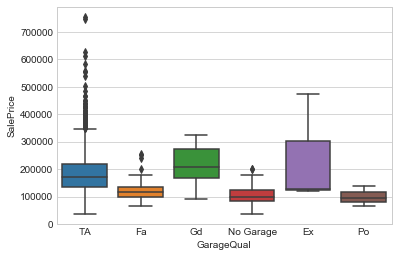

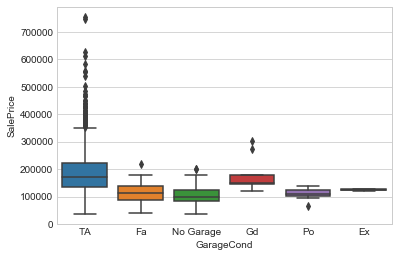

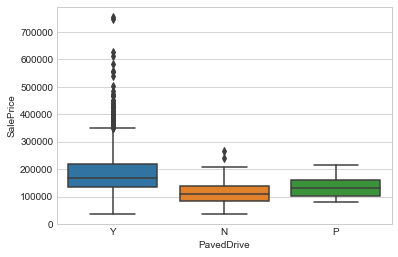

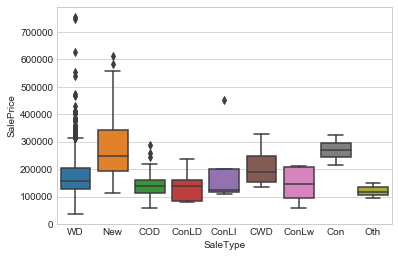

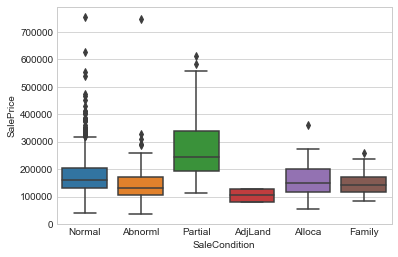

In [47]:
## creating a boxplot of categorical variables to analyse the relationship with price.
plt.style.use("seaborn-whitegrid")
for item in categorical.columns:
    plt.subplots(1,1)
    sns.boxplot(x=housing[item],y=housing["SalePrice"])
    plt.show()

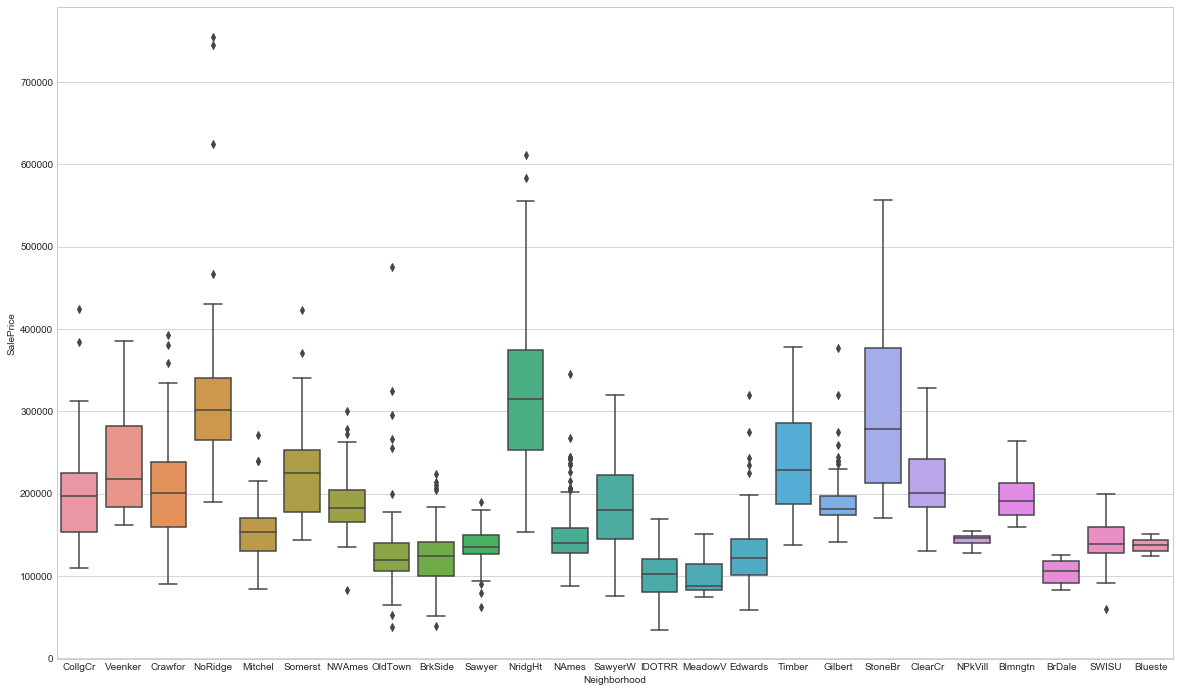

In [48]:
## boxplot for neighbourhood.
plt.figure(figsize=[20,12])
sns.boxplot(x=housing["Neighborhood"],y=housing["SalePrice"])

- NridgHt as a neighborhood has the highest median price.

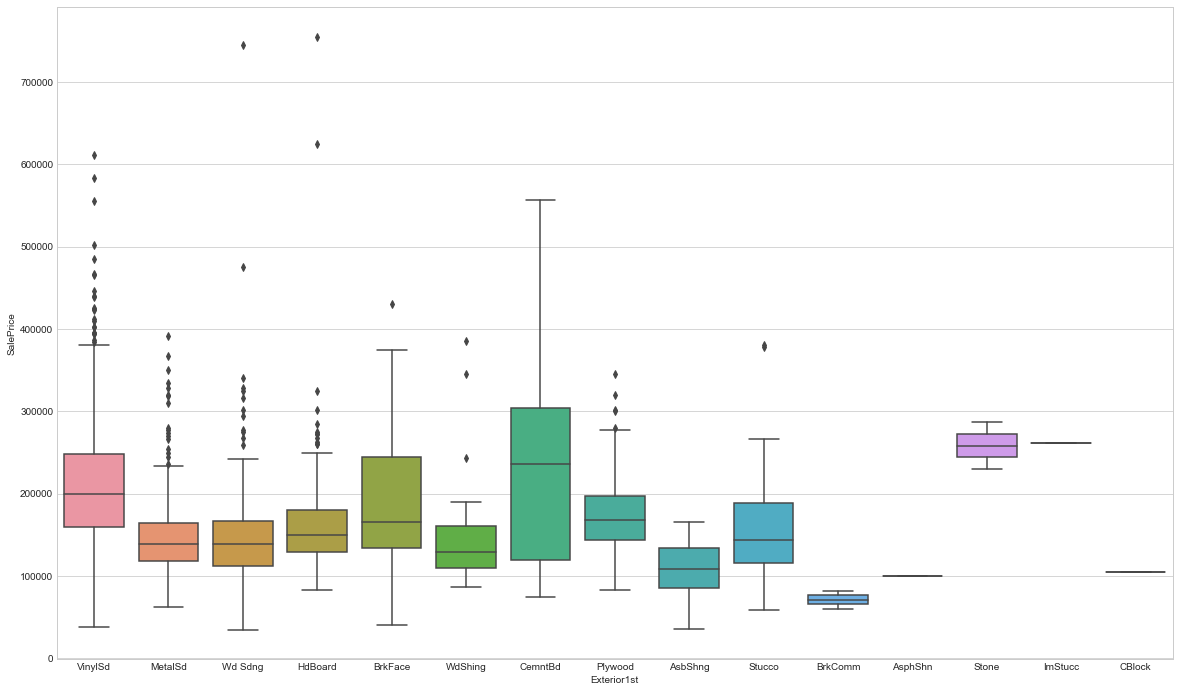

In [49]:
plt.figure(figsize=[20,12])
sns.boxplot(x=housing["Exterior1st"],y=housing["SalePrice"])

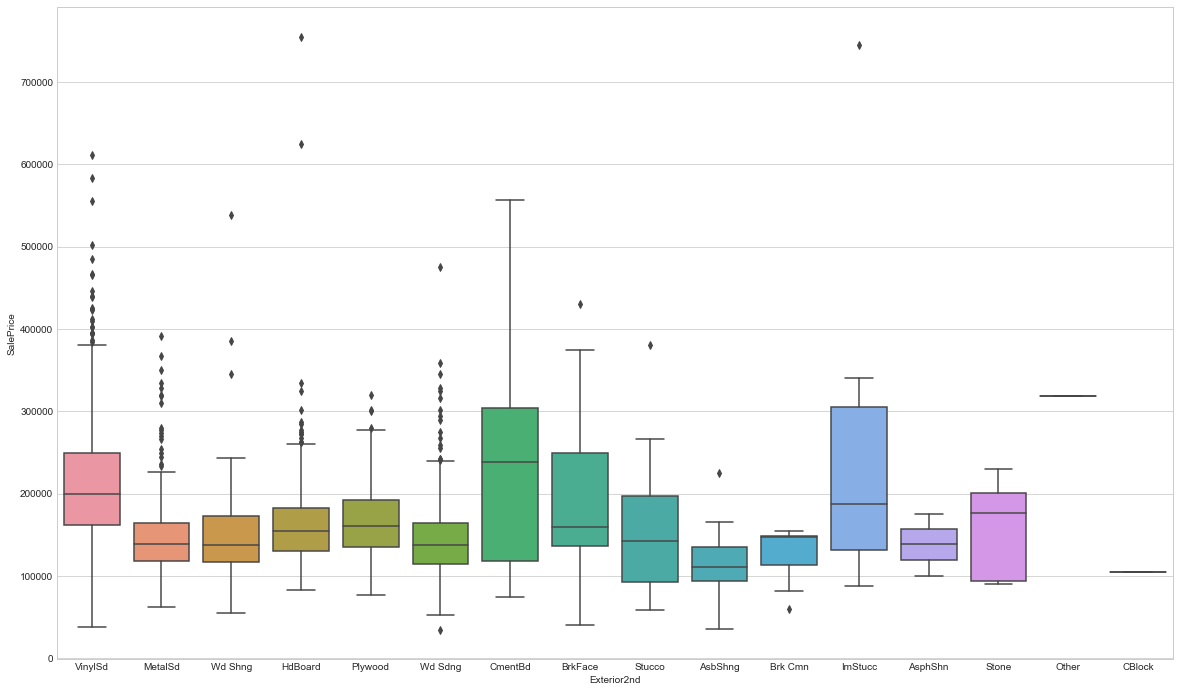

In [50]:
plt.figure(figsize=[20,12])
sns.boxplot(x=housing["Exterior2nd"],y=housing["SalePrice"])

- Cement build exterior command the highest median price.

### Inferences after EDA on categorical  variables.

- With the help of the count plot we observed that many features in the dataset have highly unbalanced classes in them, with one class being the dominant. This indicates that particular feature is common to all houses

- Most of the houses are in the "NAmes" neighborhood but "NridgHt" has the highest median price.

- Most of the houses are in RL and RM zones.
- Most have paved street.
- General shape of the property is regular and has a level contour.
- Most of the houses have all the utilities present in them.
- Most of the houses are Inside lot.
- Most of the houses have a gentle slope.
- Most of the houses are single family detached, single storied with normal conditions.
- Most of the houses have Gable roof type of Standard (Composite) Shingle.
- Most of the houses have Vinyl material for exteriors.
- Most of the houses have typical or average exterior quality and condition.
- Most of the houses have typical or average basement quality and condition.
- Most of the houses have paved driveways.
- Most of the houses have attached garages with unfinished interiors.
- Most of the houses sold are Warranty Deed - Conventional and have normal sale condition.
- FV zoning type have the highest median prices.
- Stone type mason veneering commands highest median prices.
- Excellent basement and exterior conditions commands highest median prices.

## Data Preparation.

- Based on the observations found after conducting EDA , we will do some data preparation before fitting a model on to it.

In [51]:
## Looking at the percentage count of values in the numeric data type features to observe the number of "0" in them.
for item in numerical.columns:
    print(((housing[item].value_counts())/len(housing.index))*100)
    print("*********************************************")

864     1.712329
1040    1.095890
912     0.958904
848     0.821918
894     0.821918
          ...   
1285    0.068493
1287    0.068493
1288    0.068493
1297    0.068493
2053    0.068493
Name: 1stFlrSF, Length: 753, dtype: float64
*********************************************
0       56.780822
728      0.684932
504      0.616438
672      0.547945
546      0.547945
          ...    
788      0.068493
1116     0.068493
1112     0.068493
1111     0.068493
1872     0.068493
Name: 2ndFlrSF, Length: 417, dtype: float64
*********************************************
0      98.356164
168     0.205479
216     0.136986
144     0.136986
180     0.136986
245     0.068493
238     0.068493
290     0.068493
196     0.068493
182     0.068493
407     0.068493
304     0.068493
162     0.068493
153     0.068493
320     0.068493
140     0.068493
130     0.068493
96      0.068493
23      0.068493
508     0.068493
Name: 3SsnPorch, dtype: float64
*********************************************
3    55.068493
2 

In [52]:
#Creating a list of features having majority zero values.
zeroes = ["3SsnPorch","LowQualFinSF","MiscVal","PoolArea","ScreenPorch","BsmtHalfBath"]

In [53]:
## Since more than 90% of the houses do not have these features, we drop them for our analysis.

housing.drop(zeroes,axis=1,inplace=True)

In [54]:
## updating the same in numerical dataframe.

numerical.drop(zeroes,axis=1,inplace=True)

### Dealing with unbalanced classes in categorical variables.

In [55]:
## Based on EDA , we have prepared a list of features which have highly unbalanced classes in them
## List of features having unbalanced classes.
unbalanced = ["LandContour","LandSlope","Condition1","Condition2","BldgType","RoofMatl","BsmtCond","BsmtFinType2",
             "Heating","Electrical","Functional","GarageQual","GarageCond","PavedDrive","SaleType",
             "SaleCondition"]

In [56]:
## calculating the percentage of unbalance in the features.
for item in unbalanced:
    print(((housing[item].value_counts())/len(housing.index))*100)
    print("***************************")

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
***************************
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
***************************
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64
***************************
Norm      98.972603
Feedr      0.410959
PosN       0.136986
RRNn       0.136986
Artery     0.136986
PosA       0.068493
RRAn       0.068493
RRAe       0.068493
Name: Condition2, dtype: float64
***************************
1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64
***************************
CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
ClyTile     0.068493
Metal       0.068493
Roll        

In [57]:
## features having more than 90% value in a single class indicates that most houses have these features and hence it is not a differentiating factor.
## dropping variables with more than 90% unbalanced class.

dropping =["LandSlope","Condition2","RoofMatl","Heating","Electrical","Functional","GarageCond","PavedDrive"]

housing.drop(dropping,axis=1,inplace=True)

In [58]:
##updating the categorical dataset once again.

categorical = housing.loc[:,housing.dtypes==np.object]

### Derived metric.

In [59]:
## Age of the house = Year Built - Year Sold.

housing["Age"] = housing["YearBuilt"]- housing["YrSold"]

In [60]:
## dropping the Year Built and Year Sold columns from the dataset.

housing.drop(["YearBuilt","YrSold"],axis=1,inplace=True)

In [61]:
numerical.drop(["YearBuilt","YrSold"],axis=1,inplace=True)

### Treatment of skewed distributions

In [62]:
## we are doing a log transformation on the target variable to make it more normal.
housing["SalePrice"] = np.log1p(housing["SalePrice"])

### Feature Selection

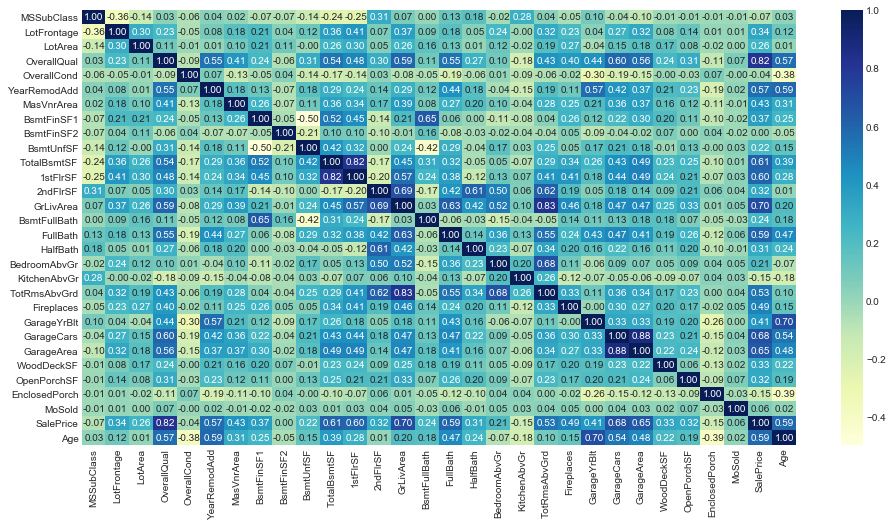

In [63]:
## plotting a heatmp for our dataset.
plt.figure(figsize=[16,8])
sns.heatmap(housing.corr(),annot=True,cmap="YlGnBu",fmt="0.2f")

In [64]:
## Based on heatmap, dropping features which have a very low correlation with target variable ie. SalePrice.

housing.drop(["MSSubClass","OverallCond","BsmtFinSF2","MoSold"],axis=1,inplace=True)

In [65]:
## dropping some highly correlated features to avoid multicollinearity.

housing.drop(["TotRmsAbvGrd","TotalBsmtSF","GarageYrBlt"],axis=1,inplace=True)

### Encoding of categorical variables.

- We are converting those categorical variables which are non-numeric to numeric type using dummy variables concept.

In [66]:
##updating the categorical dataframe.
categorical = housing.loc[:,housing.dtypes==np.object]

In [67]:
numerical = housing.loc[:,housing.columns.difference(categorical.columns)]

In [68]:
numerical.head()

,1stFlrSF,2ndFlrSF,Age,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,HalfBath,KitchenAbvGr,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallQual,SalePrice,WoodDeckSF,YearRemodAdd
0,856,854,-5,3,706,1,150,0,0,2,...,1,1,8450,65.0,196.0,61,7,12.247699,0,2003
1,1262,0,-31,3,978,0,284,0,1,2,...,0,1,9600,80.0,0.0,0,6,12.109016,298,1976
2,920,866,-7,3,486,1,434,0,1,2,...,1,1,11250,68.0,162.0,42,7,12.317171,0,2002
3,961,756,-91,3,216,1,540,272,1,1,...,0,1,9550,60.0,0.0,35,7,11.849405,0,1970
4,1145,1053,-8,4,655,1,490,0,1,2,...,1,1,14260,84.0,350.0,84,8,12.429220,192,2000


In [69]:
## creating dummy variables and dropping the first one.
for item in categorical.columns:
    status = pd.get_dummies(housing[item],prefix=item,drop_first=True)
    housing = pd.concat([housing,status],axis=1)

In [70]:
housing.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,CollgCr,Norm,...,0,0,0,0,1,0,0,0,1,0
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Veenker,Feedr,...,0,0,0,0,1,0,0,0,1,0
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,CollgCr,Norm,...,0,0,0,0,1,0,0,0,1,0
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Crawfor,Norm,...,0,0,0,0,1,0,0,0,0,0
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,NoRidge,Norm,...,0,0,0,0,1,0,0,0,1,0


In [71]:
## dropping the list of variables for which dummies created.
housing.drop(categorical.columns,axis=1,inplace=True)

In [72]:
## final dataset for modelling.
housing.head()

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,196.0,706,150,856,854,1710,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,0.0,978,284,1262,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2002,162.0,486,434,920,866,1786,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1970,0.0,216,540,961,756,1717,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,350.0,655,490,1145,1053,2198,...,0,0,0,0,1,0,0,0,1,0


## Model Building.

- We are first going to use RFE to reduce the number of variables and then apply lasso and ridge regularization as per the problem statement.

In [73]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
## Rescaling feature. For this analysis we have used normalized scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [75]:
## creating a list of all the numerical features in the dataset.
num_vars=numerical.columns

In [76]:
## Fitting and transforming the values in the train set as per standard scaling.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.444444,0.000000,0.00,0.082920,0.169521,0.113889,0.000000,0.081860,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.666667,0.716667,0.16,0.174876,0.154110,0.231481,0.616949,0.424289,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.000000,0.00,0.016655,0.274401,0.098611,0.333656,0.201576,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.555556,0.883333,0.00,0.000000,0.207620,0.145602,0.307022,0.230015,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.333333,0.000000,0.00,0.000000,0.332620,0.202315,0.505569,0.355880,...,0,0,0,0,1,0,0,0,1,0


In [77]:
## specifying the X and y variables for the train dataset.

y_train = df_train.pop("SalePrice")
X_train = df_train

## Usinge RFE for feature selection

In [78]:
##importing the libraries to perform RFE.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [79]:
## Creating a linear regression model lm and selecting the top 80 features with the help of RFE.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 80)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [80]:
## Creating a list to check out which features are kept by RFE and which are dropped along with their ranking.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 59),
 ('BsmtFinSF1', False, 33),
 ('BsmtUnfSF', False, 93),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 31),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 8),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 32),
 ('GarageCars', True, 1),
 ('GarageArea', False, 95),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 72),
 ('EnclosedPorch', False, 97),
 ('Age', False, 98),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 71),
 ('LotShape_IR2', False, 58),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 100),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', True, 1),
 ('Utilities_NoSeWa', True, 1),
 ('LotConfig_CulDSac', False, 18),
 ('LotConfig_FR2', False, 5),

In [81]:
## Updating the columns list in X_train as per the features selected by RFE.
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageCars', 'WoodDeckSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosA', 'BldgType_2fmCon',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_

In [82]:
## Updating the columns list in X_train as per the features selected by RFE.
X_train_rfe = X_train[col]

In [83]:
X_train_rfe.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageCars', 'WoodDeckSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosA', 'BldgType_2fmCon',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_

### Applying Lasso Regression.

In [84]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [85]:
##importing the relevant libraries to perform lasso and ridge regression.
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [86]:
## Instantiating an object lasso for Lasso model.
## Doing a 5 fold cross-validation and fitting the model on the train set.
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [87]:
## Converting the results of cross-validation into a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011138,0.004092,0.001514,0.000894,0.0001,{'alpha': 0.0001},-0.027946,-0.032110,-0.034588,-0.026683,...,-0.030240,0.002844,1,-0.028775,-0.026508,-0.026272,-0.029056,-0.028675,-0.027857,0.001207
1,0.006231,0.003284,0.001279,0.001194,0.001,{'alpha': 0.001},-0.033332,-0.039020,-0.038983,-0.033430,...,-0.036629,0.002662,2,-0.036291,-0.034077,-0.034639,-0.035994,-0.036325,-0.035465,0.000929
2,0.006416,0.004228,0.000524,0.000695,0.01,{'alpha': 0.01},-0.066504,-0.070484,-0.065464,-0.063271,...,-0.067046,0.002643,3,-0.066970,-0.066349,-0.067084,-0.067361,-0.066430,-0.066839,0.000389
3,0.003323,0.006161,0.004234,0.006087,0.05,{'alpha': 0.05},-0.101910,-0.101972,-0.099497,-0.096597,...,-0.101049,0.002885,4,-0.100816,-0.100457,-0.101214,-0.101808,-0.099985,-0.100856,0.000625
4,0.001887,0.002469,0.000000,0.000000,0.1,{'alpha': 0.1},-0.101910,-0.101972,-0.099497,-0.096597,...,-0.101049,0.002885,4,-0.100816,-0.100457,-0.101214,-0.101808,-0.099985,-0.100856,0.000625


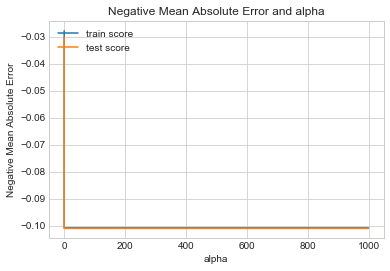

In [88]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [89]:
cv_results[["param_alpha","mean_train_score","mean_test_score"]]

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.027857,-0.030240
1,0.0010,-0.035465,-0.036629
2,0.0100,-0.066839,-0.067046
3,0.0500,-0.100856,-0.101049
4,0.1000,-0.100856,-0.101049
5,0.2000,-0.100856,-0.101049
6,0.3000,-0.100856,-0.101049
7,0.4000,-0.100856,-0.101049
8,0.5000,-0.100856,-0.101049
9,0.6000,-0.100856,-0.101049


In [90]:
## Selecting the value of alpha as 0.0001 and fitting the model onto the training set.
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
## Prediction on the train set.
y_train_pred_lasso = lasso.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

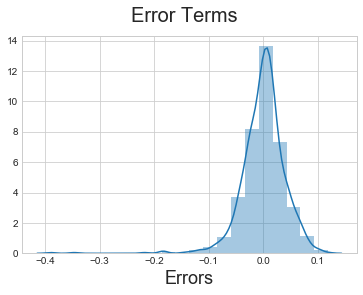

In [92]:
## Creating a plot for error terms.
## We get a normal distibution centered around "0" satisfying the assumption of linear regression.
fig = plt.figure()
sns.distplot((y_train - y_train_pred_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Prediction on the test set.

In [93]:
## Scaling the features in the test set.
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035192,0.333333,0.350000,0.00000,0.109142,0.106164,0.113889,0.000000,0.081860,...,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.047566,0.666667,0.900000,0.00000,0.000000,0.368151,0.112963,0.416465,0.246349,...,0,0,0,0,1,0,0,0,1,0
780,0.143836,0.029930,0.666667,0.766667,0.02375,0.000000,0.529538,0.203935,0.000000,0.156610,...,0,0,0,0,1,0,0,0,1,0
382,0.198630,0.036338,0.666667,0.933333,0.00000,0.000000,0.401969,0.131250,0.415496,0.261145,...,0,0,0,0,1,0,0,0,1,0
1170,0.188356,0.039309,0.555556,0.450000,0.00000,0.092488,0.245719,0.172685,0.000000,0.130669,...,0,0,0,0,1,0,0,0,1,0


In [94]:
## splitting the dataset into X and y variables
y_test = df_test.pop('SalePrice')
X_test = df_test

In [95]:
## updating the X variable with features in the train set.
X_test = X_test[X_train_rfe.columns]

In [96]:
## Prediction on the test set using the model.
y_test_pred_lasso = lasso.predict(X_test)

Text(0, 0.5, 'y_test_pred')

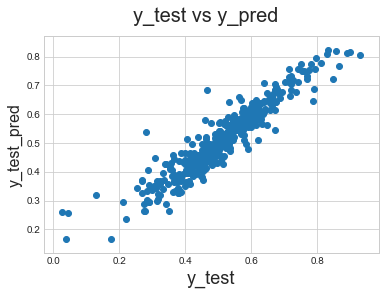

In [97]:
## Seeing the variation between actual and predicted prices with the help of a scatter plot.
fig = plt.figure()
plt.scatter(y_test,y_test_pred_lasso)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)

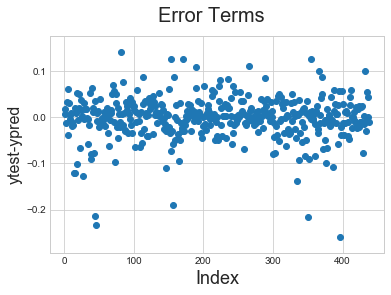

In [98]:
## Verifying another assumption of linear regression by plotting a scatter plot for the error terms and observing that 
## error terms are randomly distributed.

fig = plt.figure()
c = [i for i in range(1,439,1)]
plt.scatter(c,(y_test - y_test_pred_lasso))
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 
plt.show()

In [99]:
## comparing the train and test results using mean_squared_error.
from sklearn.metrics import mean_squared_error
print("RMSE for the train set")
print(mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso))
print("RMSE for the test set")
print(mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso))

RMSE for the train set
0.001647931370513616
RMSE for the test set
0.002162985610960432


In [116]:
## comparing with the help of r2 score.
from sklearn.metrics import r2_score
print("R2 score for the train set")
print(r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
print("R2 score the test set")
print(r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R2 score for the train set
0.9009209939956285
R2 score the test set
0.8757624480354242


### Feature selection by lasso

In [101]:
## We create a series named coef containing the features selected by lasso along with their coeffecients.
predictors = X_train_rfe.columns
coef = abs(pd.Series(lasso.coef_,predictors)).sort_values()
coef.sort_values(ascending=False)

GrLivArea             0.304978
OverallQual           0.196709
MSZoning_RL           0.097684
MSZoning_RH           0.090930
GarageCars            0.077118
                        ...   
SaleType_Con          0.000000
SaleType_ConLw        0.000000
BsmtCond_Po           0.000000
Utilities_NoSeWa      0.000000
Exterior1st_CBlock    0.000000
Length: 80, dtype: float64

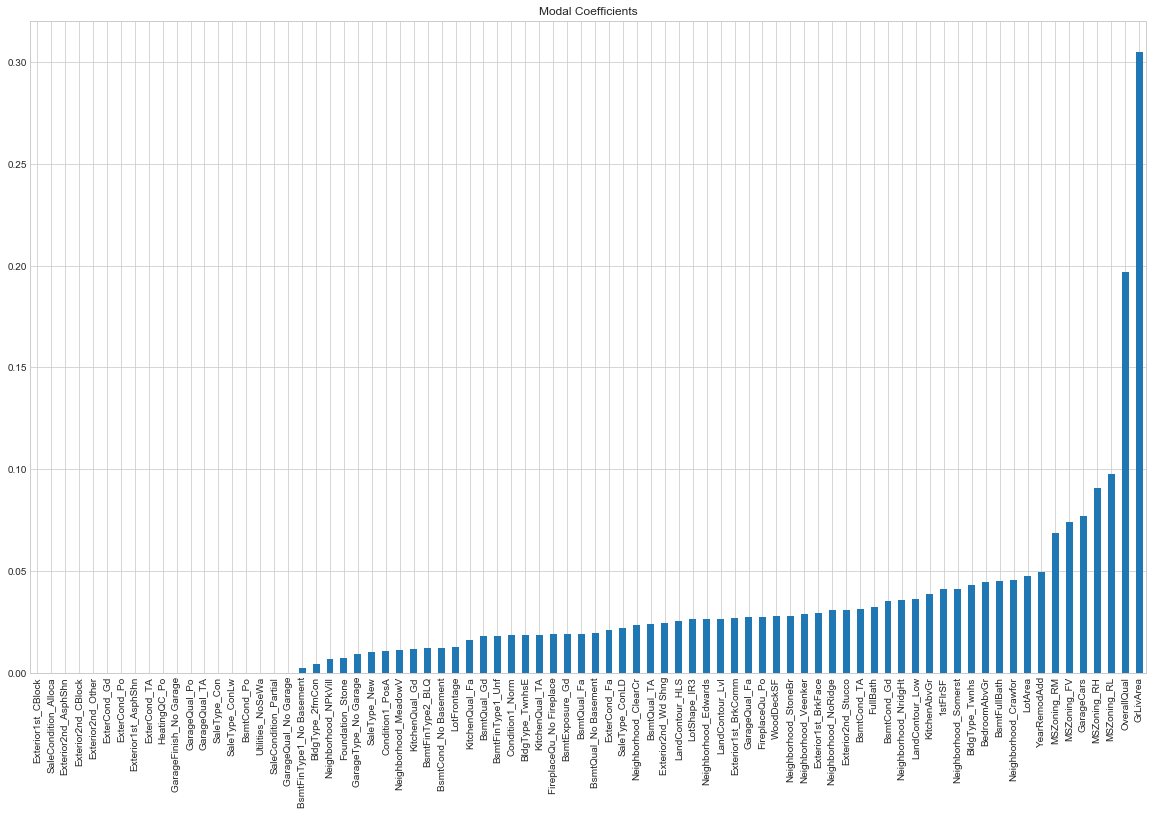

In [102]:
##plotting the absolute values of coeffecients.
plt.figure(figsize=[20,12])
predictors = X_train_rfe.columns

coef = abs(pd.Series(lasso.coef_,predictors)).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Applying Ridge regression

In [103]:
## Instantiating an object ridge and applying 5 fold cross-validation.
ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [104]:
## storing the results in cv_results dataframe.
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003382,0.002928,0.001793,0.001826,0.0001,{'alpha': 0.0001},-0.028011,-0.030917,-0.034002,-0.027560,...,-0.030058,0.002315,7,-0.027939,-0.025533,-0.025800,-0.028302,-0.028046,-0.027124,0.001199
1,0.004519,0.003709,0.001713,0.002549,0.001,{'alpha': 0.001},-0.028010,-0.030918,-0.034002,-0.027557,...,-0.030058,0.002315,6,-0.027939,-0.025533,-0.025800,-0.028303,-0.028046,-0.027124,0.001199
2,0.006249,0.007654,0.000000,0.000000,0.01,{'alpha': 0.01},-0.028003,-0.030932,-0.034005,-0.027534,...,-0.030057,0.002323,5,-0.027941,-0.025540,-0.025801,-0.028309,-0.028047,-0.027128,0.001199
3,0.011381,0.006542,0.000773,0.001546,0.05,{'alpha': 0.05},-0.027970,-0.030985,-0.034016,-0.027439,...,-0.030051,0.002357,4,-0.027951,-0.025570,-0.025810,-0.028338,-0.028058,-0.027145,0.001197
4,0.004570,0.002617,0.000804,0.000985,0.1,{'alpha': 0.1},-0.027930,-0.031039,-0.034033,-0.027327,...,-0.030045,0.002399,2,-0.027968,-0.025607,-0.025829,-0.028375,-0.028084,-0.027173,0.001197


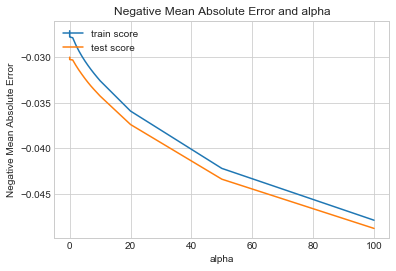

In [105]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [106]:
## looking for the best value of alpha.
cv_results[["param_alpha","mean_train_score","mean_test_score"]]

,param_alpha,mean_train_score,mean_test_score
0,0,-0.027124,-0.030058
1,0,-0.027124,-0.030058
2,0,-0.027128,-0.030057
3,0,-0.027145,-0.030051
4,0,-0.027173,-0.030045
5,0,-0.027238,-0.030041
6,0,-0.027311,-0.030049
7,0,-0.027390,-0.030080
8,0,-0.027472,-0.030116
9,0,-0.027556,-0.030152


In [122]:
## Building a model with the value of alpha as "4"
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-4.36108088e-03,  4.10172397e-02,  1.57159803e-01,  5.11835955e-02,
        6.55347301e-02,  1.65563846e-01,  4.07358295e-02,  5.98179063e-02,
        7.37702010e-02, -2.73892038e-02,  7.18229310e-02,  3.41233136e-02,
        3.68258348e-02,  4.72226770e-02,  5.62697171e-02,  2.96157474e-02,
       -2.43033805e-02,  2.05212692e-02,  3.12732286e-02,  2.29923331e-02,
       -8.63217121e-03,  2.68805016e-02,  4.86800112e-02, -2.64301401e-02,
       -2.23618775e-02, -1.76609254e-02,  4.71151663e-02,  3.34732861e-02,
        3.71793928e-02,  3.42295785e-02,  2.77076113e-02,  1.58636056e-02,
        1.90710490e-02, -8.79887546e-03, -3.79927581e-02, -2.12171493e-02,
        4.21590161e-04, -2.58596046e-02,  2.83653250e-02,  4.21552417e-05,
        4.21590161e-04,  4.21552417e-05,  0.00000000e+00, -2.19538979e-02,
       -2.37924615e-02, -2.60133093e-02, -4.92594755e-03,  0.00000000e+00,
       -4.71145955e-03,  2.10327023e-02, -2.97996676e-02, -2.48187233e-02,
       -1.91880882e-02, -

In [123]:
## comparing the train and test results using mean_squared_error.
from sklearn.metrics import mean_squared_error
y_train_pred_ridge = ridge.predict(X_train_rfe)
print("RMSE score for train set")
print(mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("RMSE score for test set")
print(mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge))

RMSE score for train set
0.00176249699543743
RMSE score for test set
0.0023286635391684104


In [124]:
## comparing with the help of r2 score.
from sklearn.metrics import r2_score
y_train_pred_ridge = ridge.predict(X_train_rfe)
print("R2 score for the train set")
print(r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("R2 score for the test set")
print(r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

R2 score for the train set
0.8940329351584554
R2 score for the test set
0.8662462403866908


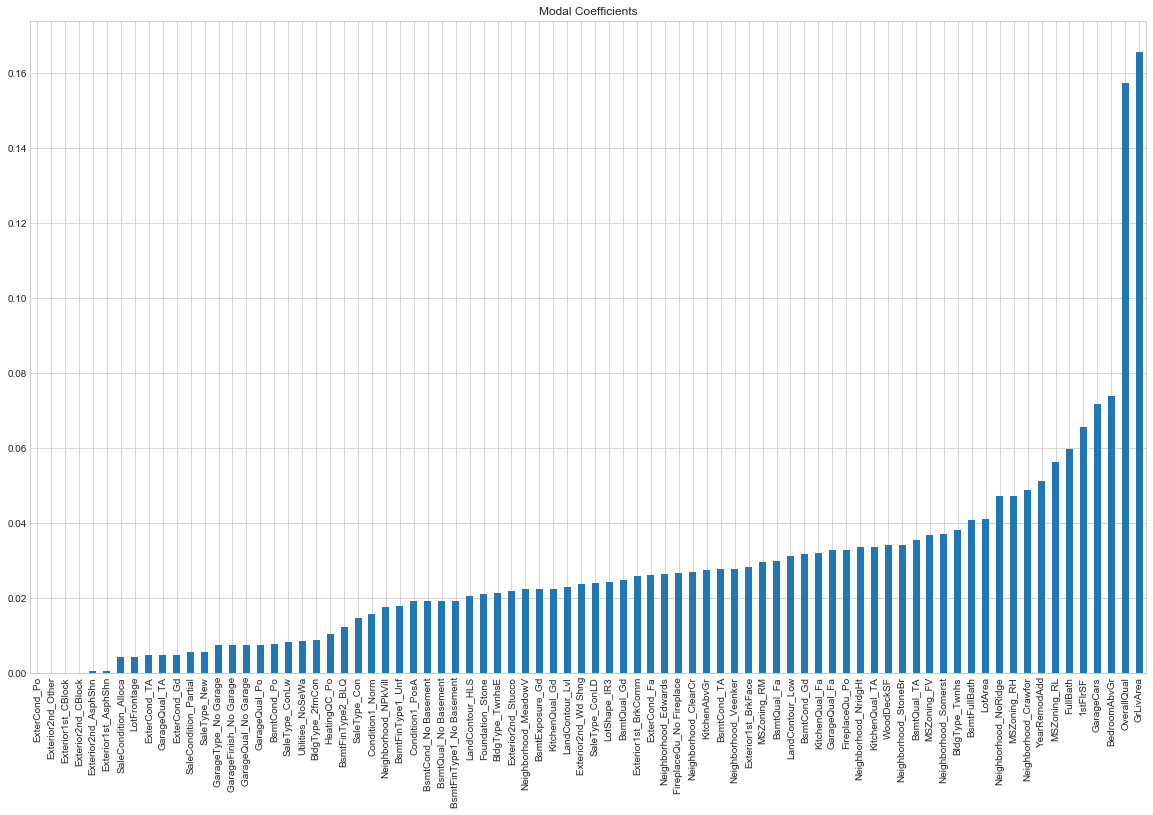

In [110]:
#checking the magnitude of coefficients
plt.figure(figsize=[20,12])
predictors = X_train_rfe.columns

coef = abs(pd.Series(ridge.coef_,predictors)).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

## Results

- After performing Lasso  and ridge regression, top  features which are affecting the Sale Price of houses are:

 1. Ground Living Area in Square feet(GrLivArea)
 2. Overall quality rating the overall material and finish of the house (OverallQual)
 3. Zoning classification of the house (MSZoning)
 4. Size of garage in car capacity(GarageCars)
 5. Remodel date of the house (YearRemodAdd)
 6. Lot Area
 7. Neighborhood
 8. Basement full bathrooms(BsmtFullBath)
 9. Bedrooms above Grade (BedroomAbvGr)
 10. Building type -Townhouse End Unit
 11. First Floor square feet area (1stFlrSF)
 12. Full Bathrooms above Grade (Full Bath)
 
 
- Optimal value of alpha for lasso is 0.0001 and for ridge is 4
-  With Lasso regression we got a R2 score for the train set as 0.90 and R2 score the test set 0.88 .
-  With Ridge regression we got R2 score for the train set 0.89 and R2 score for the test set 0.87 
-  Assumptions of linear regression have been satisfied.
